In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

In [4]:
File_path = "/content/drive/MyDrive/complaints.csv"

In [5]:
df = pd.read_csv(File_path)

In [6]:
df.head()

,S.No,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
df = df[['product','narrative']]
df.head()

,product,narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...


In [12]:
df.count()

product      162421
narrative    162411
dtype: int64

In [13]:
df['product'].nunique()

5

In [14]:
df.describe()

,product,narrative
count,162421,162411
unique,5,124472
top,credit_reporting,victim identity notified collection creditor s...
freq,91179,739


In [15]:
df.dropna(inplace=True)

In [16]:
df.count()

product      162411
narrative    162411
dtype: int64

In [17]:
def preprocess(text):
  text = text.lower()
  text = ''.join([char for char in text if char not in string.punctuation])
  tokens = word_tokenize(text)
  stop_words = set(stopwords.words('english'))
  tokens = [word for word in tokens if word not in stop_words]
  lemmatizer = WordNetLemmatizer()
  tokens = [lemmatizer.lemmatize(word) for word in tokens]
  preprocessed_text = ' '.join(tokens)

  return preprocessed_text

In [18]:
df['Processed_Narrative'] = df['narrative'].apply(preprocess)

In [19]:
df.head()

,product,narrative,Processed_Narrative
0,credit_card,purchase order day shipping amount receive pro...,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...,payment history missing credit report made mis...


In [20]:
df.drop(columns=['narrative'], inplace=True)

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [22]:
df['Encoded_Product'] = label_encoder.fit_transform(df['product'])

In [23]:
df.drop(columns=['Encoded_Product'], inplace=True)

In [24]:
df.head(5)

,product,Processed_Narrative
0,credit_card,purchase order day shipping amount receive pro...
1,credit_card,forwarded message date tue subject please inve...
2,retail_banking,forwarded message cc sent friday pdt subject f...
3,credit_reporting,payment history missing credit report speciali...
4,credit_reporting,payment history missing credit report made mis...


In [25]:
df['length']=df['Processed_Narrative'].apply(len)
df.head()

,product,Processed_Narrative,length
0,credit_card,purchase order day shipping amount receive pro...,1705
1,credit_card,forwarded message date tue subject please inve...,904
2,retail_banking,forwarded message cc sent friday pdt subject f...,1230
3,credit_reporting,payment history missing credit report speciali...,903
4,credit_reporting,payment history missing credit report made mis...,851


In [26]:
df.describe()

,length
count,162411.000000
mean,588.451743
std,830.832149
min,3.000000
25%,192.000000
50%,361.000000
75%,683.000000
max,20592.000000


In [27]:
df['product'].value_counts()

credit_reporting       91172
debt_collection        23148
mortgages_and_loans    18990
credit_card            15566
retail_banking         13535
Name: product, dtype: int64

In [28]:
df.shape

(162411, 3)

In [29]:
df_backup = df

In [30]:
df_backup.head()

,product,Processed_Narrative,length
0,credit_card,purchase order day shipping amount receive pro...,1705
1,credit_card,forwarded message date tue subject please inve...,904
2,retail_banking,forwarded message cc sent friday pdt subject f...,1230
3,credit_reporting,payment history missing credit report speciali...,903
4,credit_reporting,payment history missing credit report made mis...,851


In [31]:
df_backup.shape

(162411, 3)

<Axes: ylabel='Frequency'>

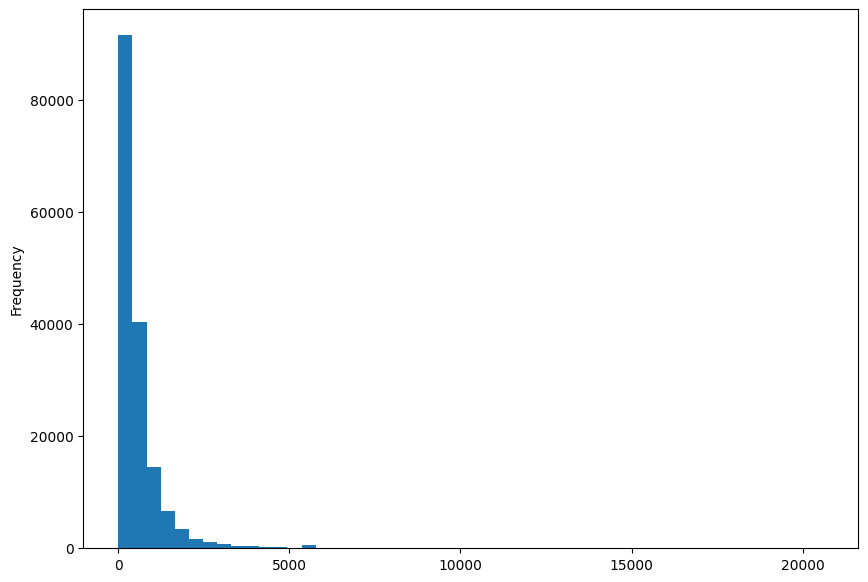

In [59]:
df_backup['length'].plot(bins=50, kind='hist',figsize=(10,7))

array([[<Axes: title={'center': 'credit_card'}>,
        <Axes: title={'center': 'credit_reporting'}>],
       [<Axes: title={'center': 'debt_collection'}>,
        <Axes: title={'center': 'mortgages_and_loans'}>],
       [<Axes: title={'center': 'retail_banking'}>, <Axes: >]],
      dtype=object)

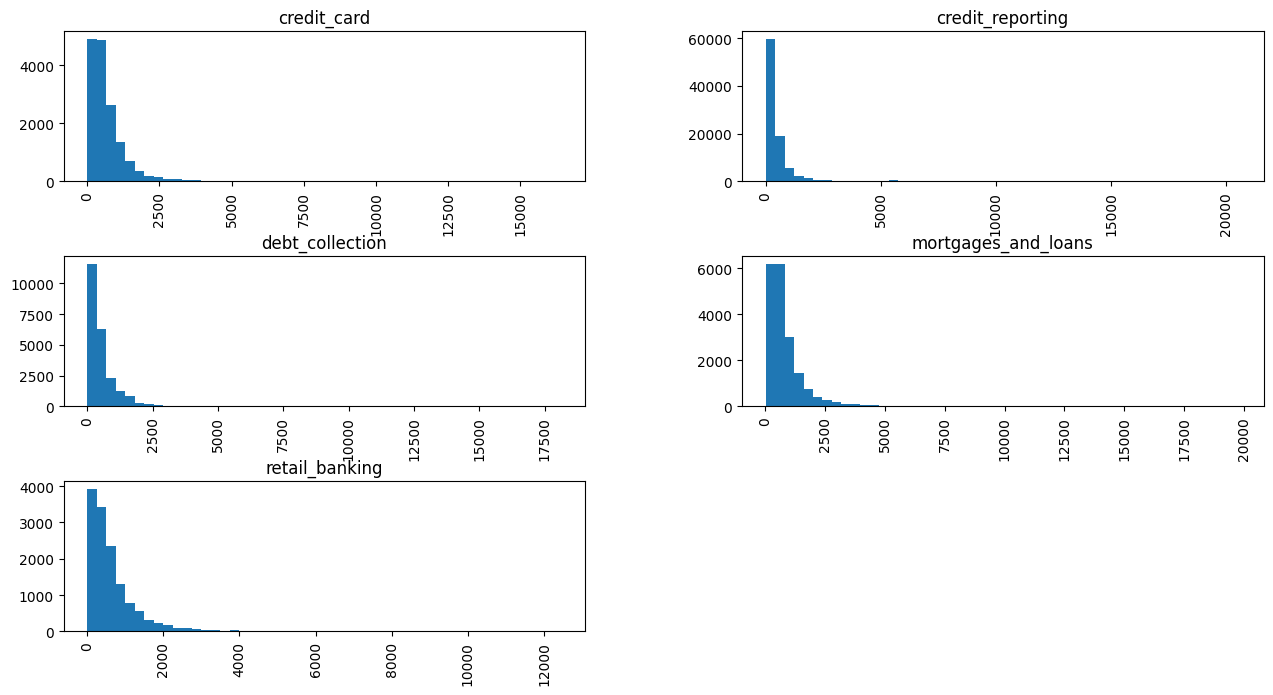

In [60]:
df_backup.hist(column='length', by='product', bins=50, figsize=(15,8))

In [32]:
df2 = df

In [33]:
df1 = df

In [34]:
df1 = df1[df1['length'] >= 50]

In [35]:
df1.shape

(157127, 3)

In [36]:
df2 = df2[df2['length'] >= 100]

In [37]:
df2.shape

(145754, 3)

In [38]:
df = df2

In [39]:
df.head()

,product,Processed_Narrative,length
0,credit_card,purchase order day shipping amount receive pro...,1705
1,credit_card,forwarded message date tue subject please inve...,904
2,retail_banking,forwarded message cc sent friday pdt subject f...,1230
3,credit_reporting,payment history missing credit report speciali...,903
4,credit_reporting,payment history missing credit report made mis...,851


In [40]:
df.shape

(145754, 3)

In [41]:
print(df.head())

            product                                Processed_Narrative  length
0       credit_card  purchase order day shipping amount receive pro...    1705
1       credit_card  forwarded message date tue subject please inve...     904
2    retail_banking  forwarded message cc sent friday pdt subject f...    1230
3  credit_reporting  payment history missing credit report speciali...     903
4  credit_reporting  payment history missing credit report made mis...     851


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [43]:
X = df['Processed_Narrative']
y = df['product']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [47]:
import joblib

In [48]:
vectorizer_path = 'tfidf_vectorizer.pkl'
joblib.dump(vectorizer, vectorizer_path)

['tfidf_vectorizer.pkl']

In [49]:
model = LogisticRegression(max_iter=2000)

In [50]:
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=2000)

In [51]:
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)

In [52]:
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.8754759699495729
                     precision    recall  f1-score   support

        credit_card       0.80      0.79      0.79      3010
   credit_reporting       0.91      0.93      0.92     15858
    debt_collection       0.82      0.74      0.78      4127
mortgages_and_loans       0.86      0.85      0.85      3745
     retail_banking       0.86      0.88      0.87      2411

           accuracy                           0.88     29151
          macro avg       0.85      0.84      0.84     29151
       weighted avg       0.87      0.88      0.87     29151



In [53]:
joblib.dump(model,'Customer_Complaint_classifier.pkl')

['Customer_Complaint_classifier.pkl']

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf_model = RandomForestClassifier()

In [56]:
rf_model.fit(X_train_vec, y_train)

RandomForestClassifier()

In [57]:
rf_accuracy = rf_model.score(X_test_vec, y_test)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.8702960447325992


In [58]:
rf_y_pred = rf_model.predict(X_test_vec)
rf_classification_report = classification_report(y_test, rf_y_pred)
print(rf_classification_report)

                     precision    recall  f1-score   support

        credit_card       0.82      0.68      0.74      3010
   credit_reporting       0.87      0.98      0.92     15858
    debt_collection       0.91      0.69      0.78      4127
mortgages_and_loans       0.87      0.82      0.84      3745
     retail_banking       0.85      0.82      0.84      2411

           accuracy                           0.87     29151
          macro avg       0.86      0.80      0.82     29151
       weighted avg       0.87      0.87      0.87     29151

